In [106]:
import networkx as nx
import matplotlib.pyplot as plt
from os.path import splitext
from contextlib import contextmanager
from pathlib import Path
from networkx.utils import create_random_state, create_py_random_state
from networkx.algorithms.flow import edmonds_karp

# Problem 1

Willy Wonka has a chocolate pipeline distribution network as shown below. Each node corresponds to a
single storage tank, and the numbers on the edges represent flow capacities (per hour) of some unit of fluid
chocolate. Note that flows are allowed in both directions between some, but not all, of the tanks. Willy
would like to determine the maximum amount of chocolate that can be sent from tank 1 to tank 8 per hour.

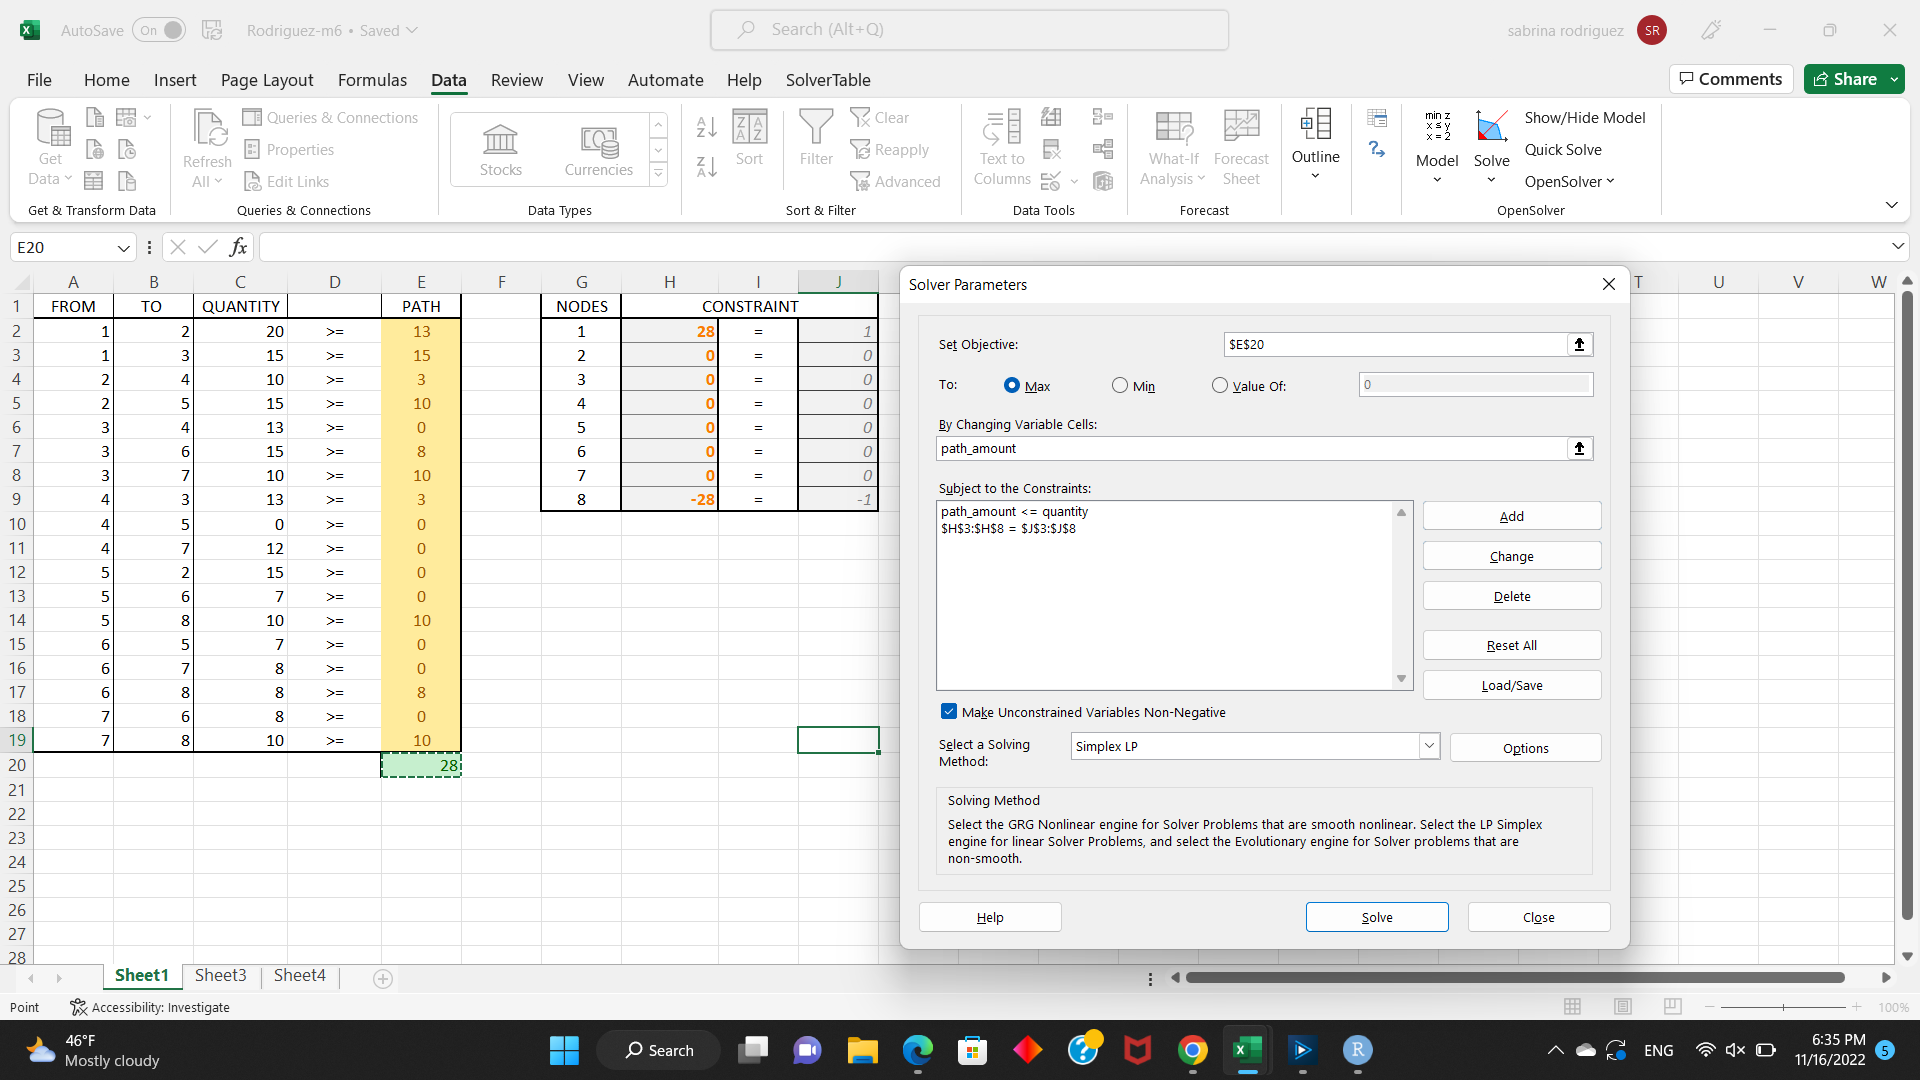

In [216]:
G = nx.DiGraph()
G.add_edge("1", "2", capacity=20.0)
G.add_edge("1", "3", capacity=15.0)

G.add_edge("2", "4", capacity=10.0)
G.add_edge("2", "5", capacity=15.0)
G.add_edge("3", "4", capacity=13.0)
G.add_edge("3", "6", capacity=15.0)
G.add_edge("3", "7", capacity=10.0)
G.add_edge("4", "3", capacity=13.0)
G.add_edge("4", "5", capacity=10.0)
G.add_edge("4", "7", capacity=12.0)
G.add_edge("5", "2", capacity=15.0)
G.add_edge("5", "6", capacity=7.0)
G.add_edge("5", "8", capacity=10.0)
G.add_edge("6", "5", capacity=7.0)
G.add_edge("6", "7", capacity=8.0)
G.add_edge("6", "8", capacity=8.0)
G.add_edge("7", "6", capacity=8.0)
G.add_edge("7", "8", capacity=10.0)

R = edmonds_karp(G, "1", "8")
flow_value = nx.maximum_flow_value(G, "1", "8")
print("The maximum amount of chocolate that can be sent from tank 1 to tank 8 per hour is", str(flow_value))

The maximum amount of chocolate that can be sent from tank 1 to tank 8 per hour is 28.0


In [213]:
for k in range(35):
    G.add_edge("1", "2", capacity=20.0+k)
    G.add_edge("1", "3", capacity=15.0+k)
    G.add_edge("5", "8", capacity=10.0+k)
    G.add_edge("6", "8", capacity=8.0+k)
    G.add_edge("7", "8", capacity=10.0+k)
    R = edmonds_karp(G, "1", "8")
    flow_value = nx.maximum_flow_value(G, "1", "8")
    print("The max flow is", str(flow_value), "when k is", str(k))

The max flow is 28.0 when k is 0
The max flow is 31.0 when k is 1
The max flow is 34.0 when k is 2
The max flow is 37.0 when k is 3
The max flow is 40.0 when k is 4
The max flow is 43.0 when k is 5
The max flow is 46.0 when k is 6
The max flow is 47.0 when k is 7
The max flow is 48.0 when k is 8
The max flow is 49.0 when k is 9
The max flow is 50.0 when k is 10
The max flow is 51.0 when k is 11
The max flow is 52.0 when k is 12
The max flow is 53.0 when k is 13
The max flow is 54.0 when k is 14
The max flow is 55.0 when k is 15
The max flow is 56.0 when k is 16
The max flow is 57.0 when k is 17
The max flow is 58.0 when k is 18
The max flow is 59.0 when k is 19
The max flow is 60.0 when k is 20
The max flow is 61.0 when k is 21
The max flow is 62.0 when k is 22
The max flow is 62.0 when k is 23
The max flow is 62.0 when k is 24
The max flow is 62.0 when k is 25
The max flow is 62.0 when k is 26
The max flow is 62.0 when k is 27
The max flow is 62.0 when k is 28
The max flow is 62.0 whe

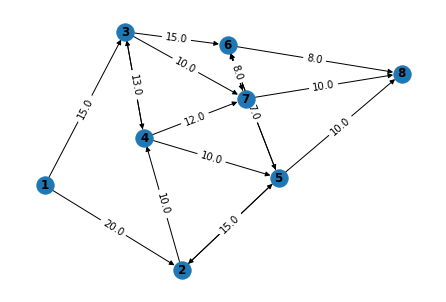

In [123]:
pos=nx.spring_layout(G)
nx.draw(G10, pos, with_labels=True, font_weight='bold')
edge_weight = nx.get_edge_attributes(G,'capacity')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
plt.show()

The maximum amount of chocolate that can be sent from tank 1 to tank 8 per hour is 28. If we increase the capacities of all arcs leading out of tank 1, and all arcs leading into tank 8 is possible to increase the chocolate amount from 28 to a maximum of 62, by increasing each arc by 22.

# Problem 2

Jenny Dewey is an operations manager for a regional chain of retail stores in the mid-Atlantic states,
including two sites in central Virginia, and one each in North Carolina, Maryland, and Washington DC.
These retail stores are supplied with products from a distribution center (DC) west of Richmond, VA.
Each morning, five large trucks are loaded at the DC with orders from each store. Given loading times
at the DC and unloading times at the stores, shipments are received at each store around lunch time, and
the trucks return back to the DC in the evening to be prepared for the next day’s operations. Each truck
usually leaves full, but, occasionally there may be some excess capacity. Around 2:00pm each afternoon,
large vans travel between stores transferring goods that are needed by one and in excess supply at another.
Earlier this morning, Jenny received a call to the distribution center requesting 500 containers of product
to the Washington location to fulfill an important order. Unfortunately, the delivery trucks to Virginia
Beach and Washington had already left. However, there was spare capacity in the trucks that had not yet
left to Maryland, Richmond, and North Carolina, of 200, 200, and 150 containers, respectively. Additionally,
Jenny called around to get the estimated capacities in the store-to-store vans. These capacities are reflected
in the following network.


In [194]:
G2 = nx.DiGraph()
G2.add_edge("Central DC", "Maryland", capacity=200.0)
G2.add_edge("Central DC", "Richmond", capacity=200.0)
G2.add_edge("Central DC", "North Carolina", capacity=150.0)

G2.add_edge("Maryland", "Washington DC", capacity=150.0)
G2.add_edge("Richmond", "Maryland", capacity=100.0)
G2.add_edge("Richmond", "Washington DC", capacity=230.0)

G2.add_edge("Richmond", "North Carolina", capacity=145.0)
G2.add_edge("North Carolina", "Richmond", capacity=125.0)
G2.add_edge("North Carolina", "Washington DC", capacity=100.0)

G2.add_edge("North Carolina", "Virginia Beach", capacity=200.0)
G2.add_edge("Virginia Beach", "North Carolina", capacity=175.0)

G2.add_edge("Virginia Beach", "Richmond", capacity=275.0)
G2.add_edge("Virginia Beach", "Washington DC", capacity=50.0)

R2 = edmonds_karp(G2, "Central DC", "Washington DC")
print(R2.graph)
flow_value2 = nx.maximum_flow_value(G2, "Central DC", "Washington DC")
flow_value2

{'inf': 6300.0, 'flow_value': 500.0, 'algorithm': 'edmonds_karp'}


500.0

In [218]:
print("Transporting Plan:")
flow_value2, flow_dict2 = nx.maximum_flow(G2, "Central DC", "Washington DC")
flow_value2
if flow_dict2["Central DC"]["Maryland"] > 0: 
    print(flow_dict2["Central DC"]["Maryland"], "from Central DC to Maryland") 
if flow_dict2["Central DC"]["Richmond"] > 0:
    print(flow_dict2["Central DC"]["Richmond"], "from Central DC to Richmond")
if flow_dict2["Central DC"]["North Carolina"] > 0:
    print(flow_dict2["Central DC"]["North Carolina"], "from Central DC to North Carolina")
if flow_dict2["Maryland"]["Washington DC"] > 0:
    print(flow_dict2["Maryland"]["Washington DC"], "from Maryland to Washington DC")
if flow_dict2["Richmond"]["North Carolina"] > 0:
    print(flow_dict2["Richmond"]["Maryland"], "from Richmond to North Carolina")
if flow_dict2["Richmond"]["Washington DC"] > 0:
    print(flow_dict2["Richmond"]["Washington DC"], "from Richmond to Washington DC")
if flow_dict2["Richmond"]["North Carolina"] > 0:    
    print(flow_dict2["Richmond"]["North Carolina"], "from Richmond to North Carolina")
if flow_dict2["North Carolina"]["Richmond"] > 0:
    print(flow_dict2["North Carolina"]["Richmond"], "from North Carolina to Richmond")
if flow_dict2["North Carolina"]["Washington DC"] > 0:
    print(flow_dict2["North Carolina"]["Washington DC"], "from North Carolina to Washington DC")
if flow_dict2["North Carolina"]["Virginia Beach"] > 0:
    print(flow_dict2["North Carolina"]["Virginia Beach"], "from North Carolina to Virginia Beach")
if flow_dict2["Virginia Beach"]["North Carolina"] > 0:
    print(flow_dict2["Virginia Beach"]["North Carolina"], "from Virginia Beach to North Carolina")
if flow_dict2["Virginia Beach"]["Richmond"] > 0:
    print(flow_dict2["Virginia Beach"]["Richmond"], "from Virginia Beach to Richmond")
if flow_dict2["Virginia Beach"]["Washington DC"] > 0:
    print(flow_dict2["Virginia Beach"]["Washington DC"], "from Virginia Beach to Washington DC")
                     

Transporting Plan:
150.0 from Central DC to Maryland
200.0 from Central DC to Richmond
150.0 from Central DC to North Carolina
150.0 from Maryland to Washington DC
230.0 from Richmond to Washington DC
30.0 from North Carolina to Richmond
100.0 from North Carolina to Washington DC
20.0 from North Carolina to Virginia Beach
20.0 from Virginia Beach to Washington DC


500 containers  of products need to arrive to Washington DC from the Central Distribution center. I need to find out if is possible, as certain number of containers are avalible in certain cities, so I want to find the maximum amount of container that could be delivered to Washington DC. 
In order to find the maximum number of containers, I used the maximum flow algorithm. In this case the maximum number of containers that can be deliver to Washington DC is exactly 500, which is what we need. So, Washington DC was able to receive the 500 containers of product by the end of the day

# Problem 3

Ker Mitdafrog is a vice president with an office in San Bernardino, and must travel to the port of Los Angeles,
located in San Pedro for an important (socially-distanced, yet in-person) meeting. Masks, of course, will be
worn. A freeway map of Southern California is given as follows, with distances in miles.

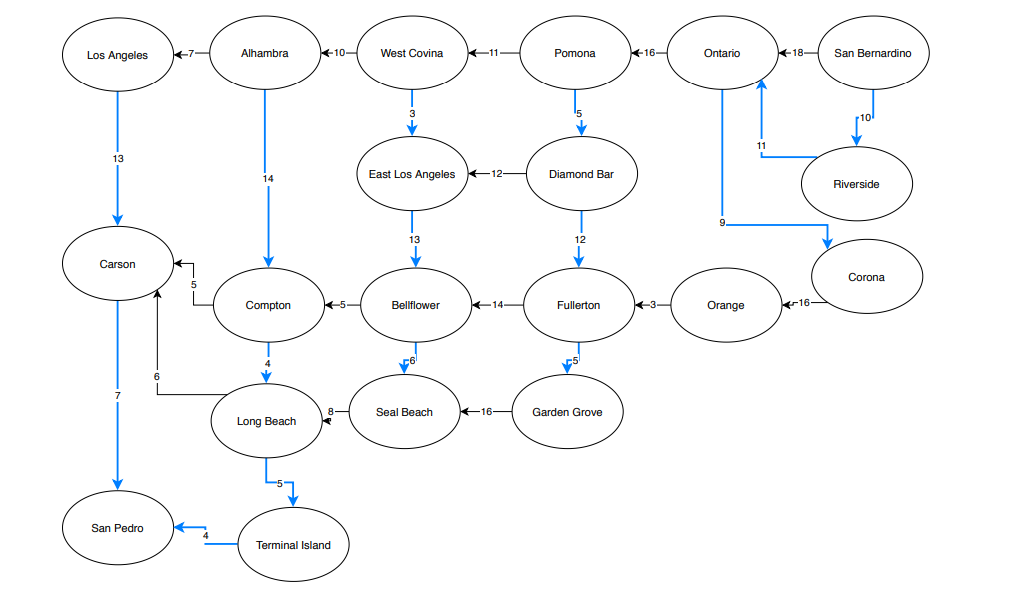

In [69]:
G3 = nx.DiGraph() 
Eg3 = [('San Bernardino', 'Ontario', 18), ('San Bernardino', 'Riverside', 10), 
('Riverside', 'Ontario', 11), ('Ontario', 'Pomona', 16), 
('Pomona', 'West Covina', 11), ('Pomona', 'Diamond Bar', 5),
('West Covina', 'East Los Angeles', 3), ('West Covina', 'Alhambra', 10),
('Los Angeles', 'Carson', 13), ('Alhambra', 'Los Angeles', 7),
('Carson', 'San Pedro', 7), ('Ontario', 'Corona', 9),
('Corona', 'Orange', 16), ('Ontario', 'Corona', 9), 
('Orange', 'Fullerton', 3), ('Fullerton', 'Bellflower', 14),
('Bellflower', 'Compton', 5), ('Fullerton', 'Garden Grove', 5),
('Bellflower', 'Seal Beach', 6), ('Compton', 'Long Beach', 4),
('Compton', 'Carson', 5),('Long Beach', 'Carson', 6),
('Terminal Island', 'San Pedro', 4), ('Long Beach', 'Terminal Island', 5),
('Alhambra', 'Compton', 14), ('East Los Angeles', 'Bellflower', 13), 
('Diamond Bar', 'East Los Angeles', 12), ('Diamond Bar', 'Fullerton', 12),
('Garden Grove', 'Seal Beach', 16), ('Seal Beach', 'Long Beach', 8)]
G3.add_weighted_edges_from(Eg3)

In [70]:
print(nx.dijkstra_path(G3, 'San Bernardino', 'San Pedro'))

['San Bernardino', 'Ontario', 'Corona', 'Orange', 'Fullerton', 'Bellflower', 'Compton', 'Carson', 'San Pedro']


In [72]:
G4 = nx.DiGraph() 
Eg4 = [('San Bernardino', 'Ontario', 18/25), ('San Bernardino', 'Riverside', 10/40), 
('Riverside', 'Ontario', 11/40), ('Ontario', 'Pomona', 16/25), 
('Pomona', 'West Covina', 11/25), ('Pomona', 'Diamond Bar', 5/40),
('West Covina', 'East Los Angeles', 3/40), ('West Covina', 'Alhambra', 10/25),
('Los Angeles', 'Carson', 13/40), ('Alhambra', 'Los Angeles', 7/25),
('Carson', 'San Pedro', 7/40), ('Ontario', 'Corona', 9/40),
('Corona', 'Orange', 16/25),  
('Orange', 'Fullerton', 3/25), ('Fullerton', 'Bellflower', 14/25),
('Bellflower', 'Compton', 5/25), ('Fullerton', 'Garden Grove', 5/40),
('Bellflower', 'Seal Beach', 6/40), ('Compton', 'Long Beach', 4/40),
('Compton', 'Carson', 5/25),('Long Beach', 'Carson', 6/25),
('Terminal Island', 'San Pedro', 4/40), ('Long Beach', 'Terminal Island', 5/40),
('Alhambra', 'Compton', 14/40), ('East Los Angeles', 'Bellflower', 13/40), 
('Diamond Bar', 'East Los Angeles', 12/25), ('Diamond Bar', 'Fullerton', 12/40),
('Garden Grove', 'Seal Beach', 16/25), ('Seal Beach', 'Long Beach', 825)]
G4.add_weighted_edges_from(Eg4)

In [73]:
print(nx.dijkstra_path(G4, 'San Bernardino', 'San Pedro'))

['San Bernardino', 'Riverside', 'Ontario', 'Pomona', 'West Covina', 'East Los Angeles', 'Bellflower', 'Compton', 'Long Beach', 'Terminal Island', 'San Pedro']


For the first Graph I was asked to find the shortest path between the two offices, so I used the "dijkstra_path" function, which finds the shortest path between nodes in the graph.  For the second graph I was asked the same but now speed for each route was included. So, I divided the distance between the speed to get the time it would take to travel through each path. The path above is the quickest path Ker Mitdafrog should take to minimize her travel time. 